# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**Note:** This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results and verify any findings independently.

## Overview

This Dandiset contains single-cell electrophysiological recordings from hippocampal CA1 neurons in mice. The neurons were genetically engineered to express programmable, antigen-gated G-protein-coupled engineered receptors (PAGERs). The recordings assess neuronal activity changes in response to activation of these engineered receptors using pharmacological agents to manipulate GPCR signaling in a cell-type and condition-specific manner.

**Dandiset information:**
- **DOI:** 10.48324/dandi.001354/0.250312.0036
- **Species:** Mus musculus (House mouse)
- **Number of subjects:** 8
- **Number of cells/recordings:** 50
- **Number of NWB files:** 50
- **Techniques:** Single-cell electrophysiology, current clamp

**Link to Dandiset:** https://dandiarchive.org/dandiset/001354/0.250312.0036

## Required packages

This notebook requires the following packages (assumed to be already installed):
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas`

## Exploring the Dandiset metadata

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036


## Exploring the NWB files in the Dandiset

In [2]:
from itertools import islice

# List the first 10 NWB assets to understand the file naming structure
assets = dandiset.get_assets_by_glob("*.nwb")
asset_list = list(islice(assets, 10))

print(f"Total NWB files: {len(list(islice(dandiset.get_assets_by_glob('*.nwb'), 100)))}")
print("\nFirst 10 NWB files:")
for i, asset in enumerate(asset_list):
    print(f"{i+1}. {asset.path} ({asset.size / (1024*1024):.1f} MB)")

Total NWB files: 50

First 10 NWB files:
1. sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (38.4 MB)
2. sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (39.3 MB)
3. sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (36.6 MB)
4. sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (42.1 MB)
5. sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (38.0 MB)
6. sub-PK-110/sub-PK-110_ses-20240723T173444_slice-2024-07-23-0010_cell-2024-07-23-0010_icephys.nwb (22.5 MB)
7. sub-PK-110/sub-PK-110_ses-20240723T195515_slice-2024-07-23-0017_cell-2024-07-23-0017_icephys.nwb (30.0 MB)
8. sub-PK-110/sub-PK-110_ses-20240723T143352_slice-2024-07-23-0003_cell-2024-07-23-0003_icephys.nwb (38.1 MB)
9. sub-PK-110/sub-PK-110_ses-20240723T185020_slice-2024-07-23-0014_cell-2024-07

The file names follow a structured pattern encoding subject ID, session timestamp, slice ID, and cell ID information. Each file represents recordings from a single cell.

## Loading and exploring NWB file structure

In [3]:
import pynwb
import h5py
import remfile

# Load an example NWB file
asset_path = 'sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb'
asset = next(dandiset.get_assets_by_glob(asset_path))

# Stream the remote file without downloading
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Extract basic session information
print(f"Session description: {nwb.session_description}")
print(f"Session identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject species: {nwb.subject.species}")

# Extract custom metadata
dandi_meta = nwb.lab_meta_data['DandiIcephysMetadata']
print(f"Cell ID: {dandi_meta.cell_id}")
print(f"Slice ID: {dandi_meta.slice_id}")
print(f"Targeted layer: {dandi_meta.targeted_layer}")

Session description: Intracellular electrophysiology experiment.
Session identifier: pk2024_07_17_0009
Session start time: 2024-07-17 18:07:19-07:00
Subject ID: PK-109
Subject sex: F
Subject species: Mus musculus
Cell ID: 2024_07_17_0009
Slice ID: 2024_07_17_0009
Targeted layer: CA1


## Understanding the data structure

In [4]:
# Explore the available stimulus and acquisition series
acq_keys = list(nwb.acquisition.keys())
stim_keys = list(nwb.stimulus.keys())

print(f"Number of acquisition series: {len(acq_keys)}")
print(f"Number of stimulus series: {len(stim_keys)}")
print(f"\nFirst 5 acquisition series: {acq_keys[:5]}")
print(f"First 5 stimulus series: {stim_keys[:5]}")

# Analyze stimulus types and durations from first few series only
print(f"\nExample stimulus description: {nwb.stimulus[stim_keys[0]].description}")
print(f"Example stimulus duration: {len(nwb.stimulus[stim_keys[0]].data) / nwb.stimulus[stim_keys[0]].rate:.1f} seconds")
print(f"Recording rate: {nwb.stimulus[stim_keys[0]].rate} Hz")

Number of acquisition series: 624
Number of stimulus series: 624

First 5 acquisition series: ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0']
First 5 stimulus series: ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0']

Example stimulus description: Stim type: ramp
Example stimulus duration: 5.0 seconds
Recording rate: 20000.0 Hz


The data shows that this file contains 624 stimulus-response pairs organized as sequential sweeps, with each sweep having two channels. All sweeps use a "ramp" stimulus protocol with uniform 5-second duration.

## Visualizing stimulus-response pairs

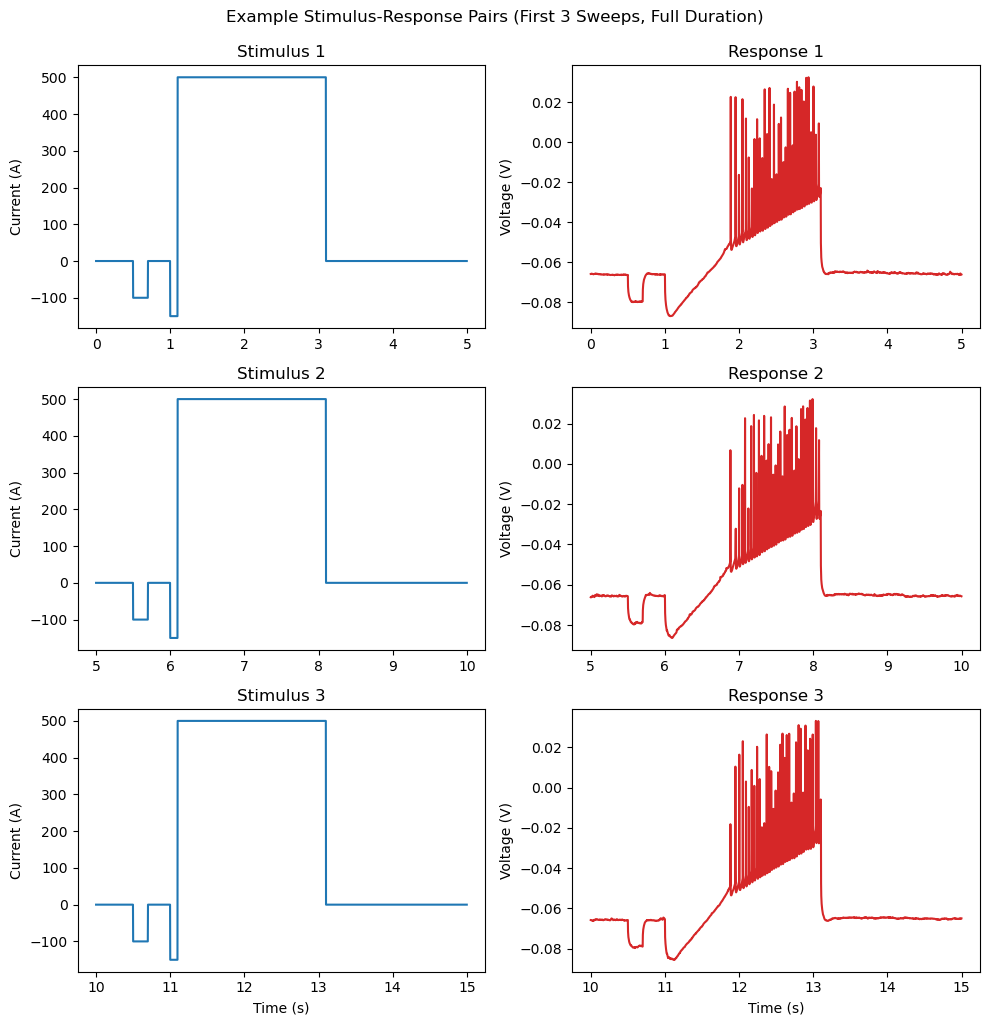

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load the first 3 stimulus-response pairs for visualization
pairs = []
for i in range(1, 4):
    stim = nwb.stimulus[f'stimulus-0{i}-ch-0']
    resp = nwb.acquisition[f'current_clamp-response-0{i}-ch-0']
    pairs.append((stim, resp))

# Create figure with stimulus and response traces
fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)

for idx, (stim, resp) in enumerate(pairs):
    # Load full sweep data
    stim_data = stim.data[:]
    resp_data = resp.data[:]
    stim_time = np.arange(len(stim_data)) / stim.rate + stim.starting_time
    resp_time = np.arange(len(resp_data)) / resp.rate + resp.starting_time
    
    # Downsample for plotting to improve performance
    ds_factor = 50
    axes[idx,0].plot(stim_time[::ds_factor], stim_data[::ds_factor], color='tab:blue')
    axes[idx,0].set_ylabel('Current (A)')
    axes[idx,0].set_title(f'Stimulus {idx+1}')
    axes[idx,1].plot(resp_time[::ds_factor], resp_data[::ds_factor] * resp.conversion, color='tab:red')
    axes[idx,1].set_ylabel('Voltage (V)')
    axes[idx,1].set_title(f'Response {idx+1}')
    
axes[-1,0].set_xlabel('Time (s)')
axes[-1,1].set_xlabel('Time (s)')
plt.tight_layout()
plt.suptitle('Example Stimulus-Response Pairs (First 3 Sweeps, Full Duration)', y=1.02)
plt.show()

These traces show the complete stimulus-response relationship for the first three sweeps. The stimulus consists of current ramps that elicit complex voltage responses including action potentials in the recorded CA1 neurons.

## Population analysis: overlaying multiple sweeps

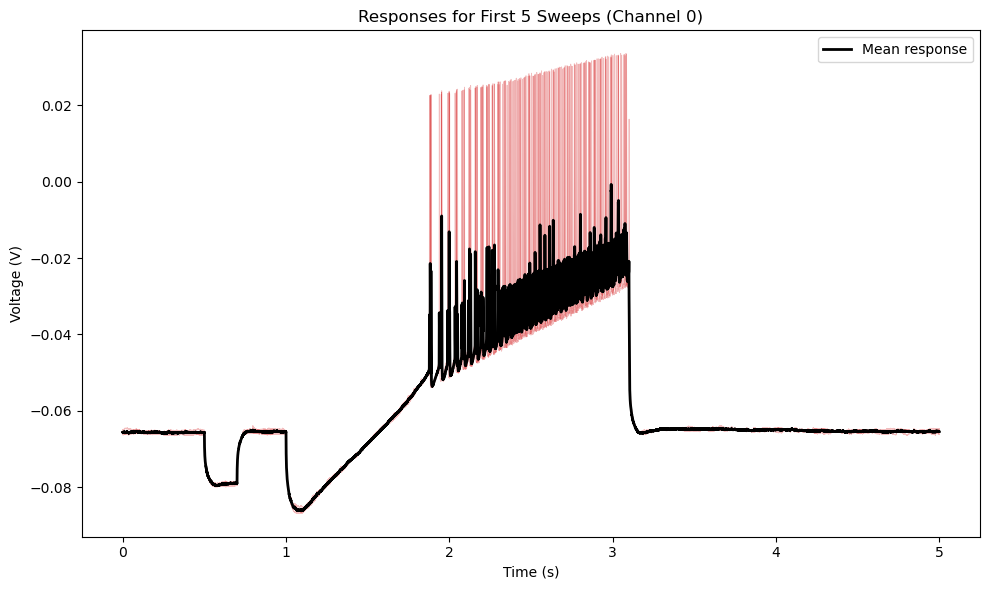

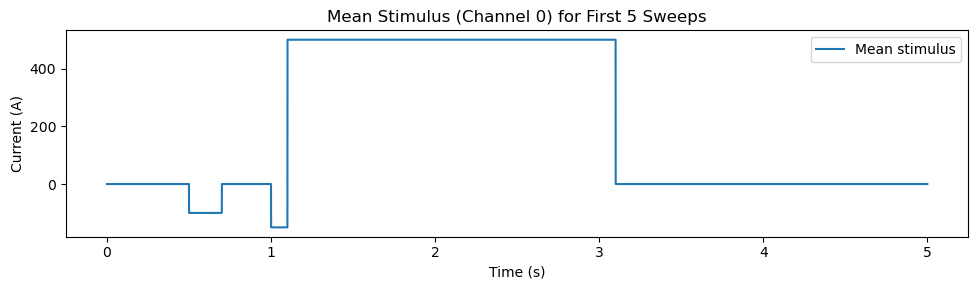

In [6]:
# Load a smaller number of sweeps (5) for channel 0 to show response consistency
n_sweeps = 5
responses = []
stimuli = []
time = None

for i in range(1, n_sweeps+1):
    stim_key = f'stimulus-{i:02d}-ch-0'
    resp_key = f'current_clamp-response-{i:02d}-ch-0'
    stim = nwb.stimulus[stim_key]
    resp = nwb.acquisition[resp_key]
    
    stim_data = stim.data[:]
    resp_data = resp.data[:] * resp.conversion
    stimuli.append(stim_data)
    responses.append(resp_data)
    
    if time is None:
        time = np.arange(len(stim_data)) / stim.rate + stim.starting_time

responses = np.array(responses)
stimuli = np.array(stimuli)

# Plot overlaid responses with mean
plt.figure(figsize=(10, 6))
for r in responses:
    plt.plot(time, r, color='tab:red', alpha=0.3, linewidth=0.6)
plt.plot(time, np.mean(responses, axis=0), color='black', label='Mean response', linewidth=2)
plt.title('Responses for First 5 Sweeps (Channel 0)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot mean stimulus
plt.figure(figsize=(10, 3))
plt.plot(time, np.mean(stimuli, axis=0), color='tab:blue', label='Mean stimulus')
plt.title('Mean Stimulus (Channel 0) for First 5 Sweeps')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.tight_layout()
plt.show()

# Close the current file before proceeding
io.close()

The overlay plot reveals the consistency of the ramp stimulus protocol and shows both the reproducibility and variability in neuronal responses across repeated trials. The mean response trace (black) illustrates the typical pattern of voltage changes and spiking activity.

## Exploring metadata across multiple files

In [7]:
import pandas as pd

# Sample metadata from the first 5 files for demonstration
assets_sample = list(islice(dandiset.get_assets_by_glob("*.nwb"), 5))
meta_rows = []

for asset in assets_sample:
    # Load each file to extract metadata
    remote_file = remfile.File(asset.download_url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
    nwb = io.read()
    
    dandi_meta = nwb.lab_meta_data['DandiIcephysMetadata']
    row = {
        "cell_id": dandi_meta.cell_id,
        "subject_id": nwb.subject.subject_id,
        "targeted_layer": dandi_meta.targeted_layer,
        "n_sweeps": len(nwb.acquisition) // 2  # Divide by 2 for dual-channel setup
    }
    meta_rows.append(row)
    io.close()

meta_df = pd.DataFrame(meta_rows)
print("Sample metadata across files:")
print(meta_df.to_string(index=False))

Sample metadata across files:
        cell_id subject_id targeted_layer  n_sweeps
2024_07_17_0009     PK-109            CA1       312
2024_07_17_0001     PK-109            CA1       312
2024_07_17_0011     PK-109            CA1       312
2024_07_17_0005     PK-109            CA1       312
2024_07_17_0003     PK-109            CA1       312


This metadata table provides an overview of the experimental sessions, showing the distribution of recordings across different subjects and the number of recorded sweeps per cell.

## Quality control: sweep count distribution

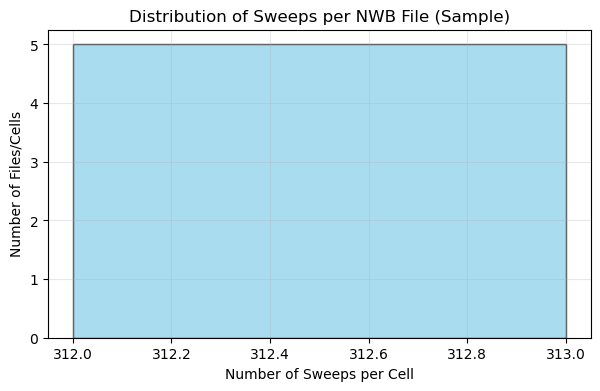

Mean sweeps per cell: 312.0
Range: 312 - 312 sweeps


In [8]:
# Plot distribution of sweep counts across the sampled files
sweep_counts = meta_df['n_sweeps'].values

plt.figure(figsize=(7, 4))
plt.hist(sweep_counts, bins=range(min(sweep_counts), max(sweep_counts) + 2), 
         color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Sweeps per Cell')
plt.ylabel('Number of Files/Cells')
plt.title('Distribution of Sweeps per NWB File (Sample)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Mean sweeps per cell: {np.mean(sweep_counts):.1f}")
print(f"Range: {min(sweep_counts)} - {max(sweep_counts)} sweeps")

## Next steps for analysis

This notebook provides the foundation for exploring Dandiset 001354. Researchers can build upon these examples to:

- Analyze stimulus-response relationships across different protocols
- Compare responses between different cells, subjects, or experimental conditions  
- Extract quantitative features such as spike counts, membrane potential changes, or response latencies
- Investigate the effects of PAGER activation on neural activity patterns

The code examples demonstrate how to systematically load, visualize, and analyze the intracellular electrophysiology data stored in this Dandiset's NWB files.